<center>
    <h1><b>Prediction on Digits Dataset Using SVM</b></h1>
    --------------------------------
</center>

**Problem**

Train SVM classifier using sklearn digits dataset (i.e from sklearn datasets import load_digits)
 - Measure accuracy of the model using different kernels such as rbf and linear.
 - Tune the model further using regularization and gamma parameters and try to come up with highest accuracy score
 - Ues 80% of samples as training data size

In [1]:
# Libraries importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
import pickle as pk

%matplotlib inline

In [2]:
# Loading dataset
digits = load_digits()

In [3]:
# Dataset features
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# creating dataframe with the dataset
df = pd.DataFrame(digits.data, columns = digits.feature_names)

### Exploration

In [5]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
# Knowing the number of columns and rows
f'Columns: {df.shape[0]}', f'Rows: {df.shape[1]}'

('Columns: 1797', 'Rows: 64')

In [7]:
# Adding trget variable to the column
df['target'] = digits.target

In [8]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [9]:
# checking for null values
df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

<Figure size 640x480 with 0 Axes>

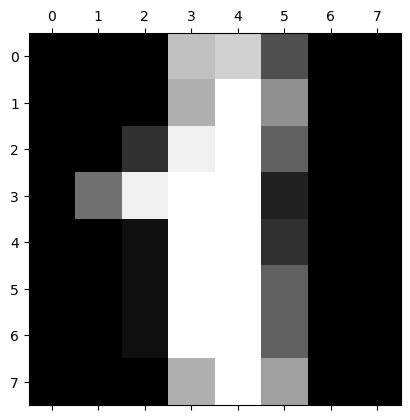

In [10]:
# Visualizing 
plt.gray()
plt.matshow(digits.images[1]);

### Model 
Regularisation parameters: C= 1 ..., gamma =10 ..., kernel='rbf', 'linear', 'poly', etc

In [11]:
X = df.drop(columns = 'target', axis = True)
y = df.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [13]:
# The first model
model1 = SVC(kernel = 'rbf')
model1.fit(X_train, y_train)

SVC()

In [14]:
# The second model
model2 = SVC(kernel = 'linear')
model2.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
model3 = SVC(C = 1)
model3.fit(X_train, y_train)

SVC(C=1)

In [16]:
model4 = SVC(C = 10)
model4.fit(X_train, y_train)

SVC(C=10)

In [17]:
model5 = SVC(gamma = 'scale')
model5.fit(X_train, y_train)

SVC()

In [18]:
model6 = SVC(kernel = 'poly')
model6.fit (X_train, y_train)

SVC(kernel='poly')

### Model Evaluation

In [19]:
def print_models(models):
    for i in models:
        print(f'{i}: {(i.score(X_test, y_test) * 100).round(2)}%')

In [20]:
models = [model1, model2, model3, model4, model5, model6]
print_models(models)

SVC(): 99.17%
SVC(kernel='linear'): 97.78%
SVC(C=1): 99.17%
SVC(C=10): 99.17%
SVC(): 99.17%
SVC(kernel='poly'): 98.89%


###

In [21]:
# Prediction
predict = model1.predict(X_test)

In [22]:
con_matrix = confusion_matrix(y_test, predict)
con_matrix

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

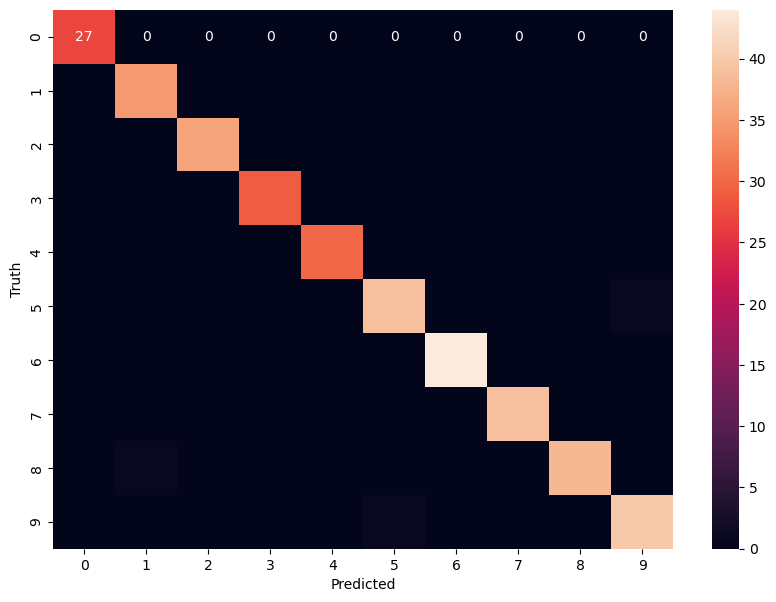

In [23]:
# Visualizing the Confusion Matrix Output
plt.figure(figsize = [10,7])
sb.heatmap(con_matrix, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

### Saving The Choosen Model

In [24]:
with open('model_digits_SVM', 'wb') as fl:
    pk.dump(model1, fl)